## Clase 2

In [9]:
library( car )
library( ggplot2 )
library( lmtest )

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




### Análisis de Diagnóstico

Se dispone de varios test: Shapiro-Wilks, Lilliefors, Anderson-Darling entre otros, todos ellos disponibles en R.

In [3]:
library(nortest) # REALIZA 10 PRUEBAS DE NORMALIDAD #

SUPHOJA <- c( 44.09, 36.67, 51.72, 36.04, 38.97, 41.28, 42.06, 53.33, 40.14, 39.31, 33.53, 36.88, 36.94, 34.13, 42.03, 41.55 )
PESOF <- c( 49.29, 49, 43.04, 66.79, 63.11, 43.8, 39.63, 44.98, 21.44, 38.75, 40.96, 39.39, 54.7, 44.65, 39.65, 47.16 )
LONGF <- c( 46.34, 44.58, 40.06, 51.3, 50.7, 40.29, 39.71, 40.1, 29.63, 37, 37.38, 36.14, 49.33, 42.37, 37.4, 39.4 )

hojas <- data.frame( SUPHOJA, PESOF, LONGF )

mod_hojas <- lm( PESOF ~ LONGF, data=hojas )

residuos=residuals(mod_hojas)
shapiro.test(residuos)
ad.test(residuos)
lillie.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.95305, p-value = 0.5394



	Anderson-Darling normality test

data:  residuos
A = 0.27592, p-value = 0.6085



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuos
D = 0.1077, p-value = 0.889


Conclusión: Todos los test coinciden en que puede sostenerse el supuesto de normalidad.

### Validación de la Normalidad: Estrategias gráficas

Los gráficos de cuantil-cuantil o qq-plots visibilizan los apartamientos respecto de la normalidad de los residuos del modelo ajustado.

[1] 16  1

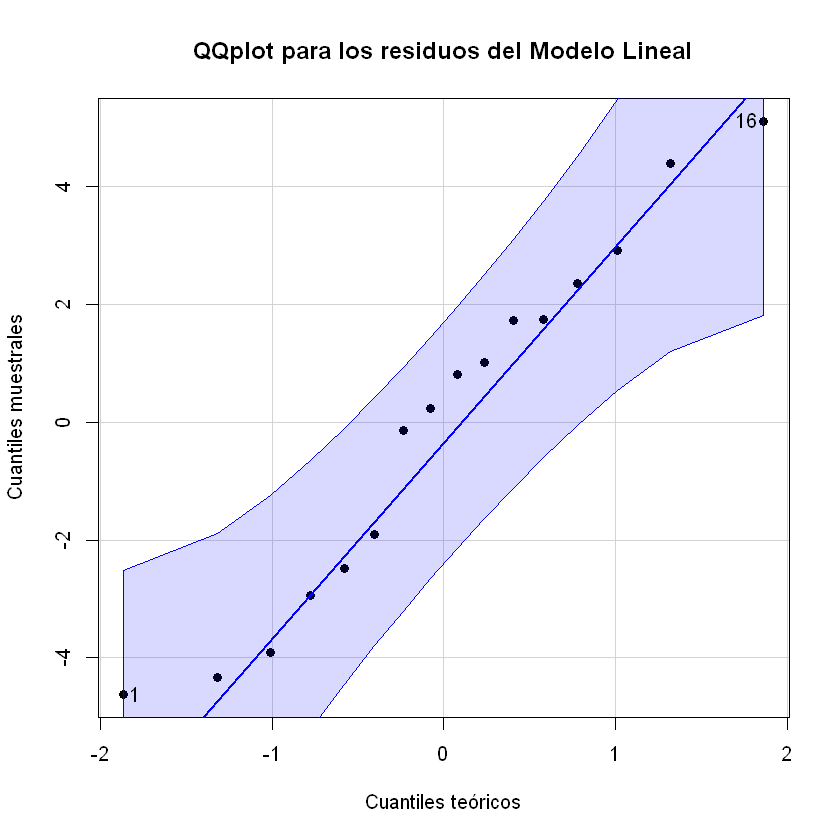

In [6]:
qqPlot(residuos, pch=19,
    main="QQplot para los residuos del Modelo Lineal",
    xlab="Cuantiles teóricos",
    ylab="Cuantiles muestrales" )

### Validación de la independencia

In [8]:
ggplot( dwdata, aes( x=orden, y=residuos ) ) +
    geom_point( color = "#013ADF", fill = "#013ADF", size = 4, shape = 18, alpha = 0.5 ) + 
    xlab( "orden" ) +
    geom_abline( slope = 0 )

ERROR: Error in ggplot(dwdata, aes(x = orden, y = residuos)): objeto 'dwdata' no encontrado


In [10]:
dwtest( mod_hojas, alternative="two.sided", iterations = 1000 )


	Durbin-Watson test

data:  mod_hojas
DW = 1.5159, p-value = 0.2612
alternative hypothesis: true autocorrelation is not 0


### Validación de la homocedasticidad

In [11]:
bptest( mod_hojas )
gqtest( mod_hojas, order.by = LONGF, data=hojas )


	studentized Breusch-Pagan test

data:  mod_hojas
BP = 0.84363, df = 1, p-value = 0.3584



	Goldfeld-Quandt test

data:  mod_hojas
GQ = 1.4074, df1 = 6, df2 = 6, p-value = 0.3443
alternative hypothesis: variance increases from segment 1 to 2


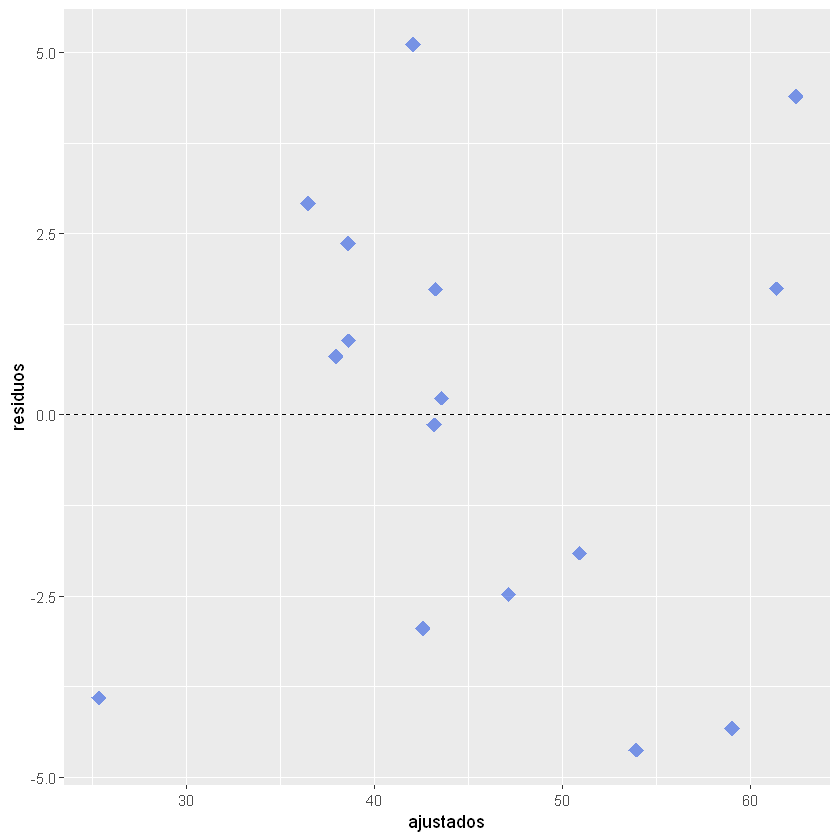

In [12]:
ajustados <- mod_hojas$fitted.values
databp <- data.frame( ajustados, residuos )

ggplot( databp, aes( x=ajustados, y=residuos ) ) +
    geom_point( color = "#013ADF", fill = "#013ADF", size = 4, shape = 18, alpha = 0.5) + 
    xlab( "ajustados" ) +
    geom_abline( slope = 0, linetype="dashed" )

In [13]:
outlierTest( mod_hojas )

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
16 1.797485           0.095514           NA

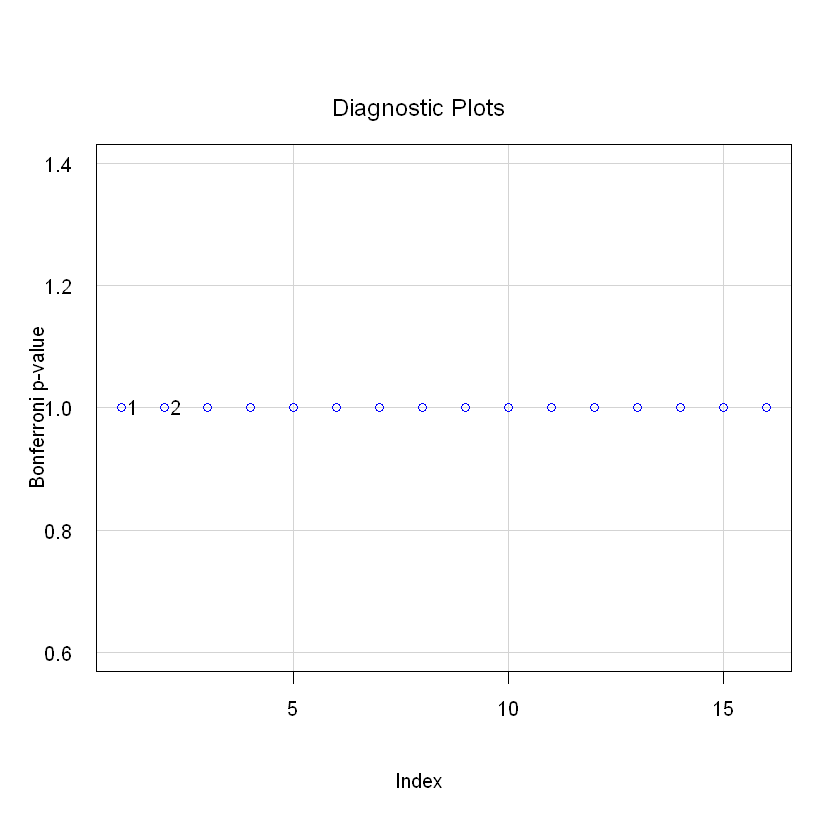

In [14]:
influenceIndexPlot( mod_hojas, vars="Bonf", las=1, col="blue")